In [725]:
import pandas as pd
import numpy as np  


In [726]:
num_samples = 10

random_state = 16

num_of_ratios = 5

Load the metadata file. We index it by sample_id, but keep this column as well as a feature

In [727]:
metadata = pd.read_csv("../Data/metadata.csv").set_index('sample_id',drop = False)

metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, S0000 to S1505
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 70.0+ KB


In [728]:
metadata.head()

sample_id  split instrument_type             features_path  \
sample_id                                                              
S0000         S0000  train      commercial  train_features/S0000.csv   
S0001         S0001  train      commercial  train_features/S0001.csv   
S0002         S0002  train      commercial  train_features/S0002.csv   
S0003         S0003  train      commercial  train_features/S0003.csv   
S0004         S0004  train      commercial  train_features/S0004.csv   

                          features_md5_hash  
sample_id                                    
S0000      017b9a71a702e81a828e6242aa15f049  
S0001      0d09840214054d254bd49436c6a6f315  
S0002      3f58b3c9b001bfed6ed4e4f757083e09  
S0003      e9a12f96114a2fda60b36f4c0f513fb1  
S0004      b67603d3931897bfa796ac42cc16de78

We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [729]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

sample_id  split instrument_type                     features_path  \
sample_id                                                                      
S0000         S0000  train      commercial  ../Data/train_features/S0000.csv   
S0001         S0001  train      commercial  ../Data/train_features/S0001.csv   
S0002         S0002  train      commercial  ../Data/train_features/S0002.csv   
S0003         S0003  train      commercial  ../Data/train_features/S0003.csv   
S0004         S0004  train      commercial  ../Data/train_features/S0004.csv   

                          features_md5_hash  
sample_id                                    
S0000      017b9a71a702e81a828e6242aa15f049  
S0001      0d09840214054d254bd49436c6a6f315  
S0002      3f58b3c9b001bfed6ed4e4f757083e09  
S0003      e9a12f96114a2fda60b36f4c0f513fb1  
S0004      b67603d3931897bfa796ac42cc16de78

Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded.

In [730]:
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()

# creates a dictionary that contains a path for each sample

Check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [731]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now examine the train_labels.csv file

In [811]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

basalt  carbonate  chloride  iron_oxide  oxalate  oxychlorine  \
sample_id                                                                  
S0000           0          0         0           0        0            0   
S0001           0          1         0           0        0            0   
S0002           0          0         0           0        0            1   
S0003           0          1         0           1        0            0   
S0004           0          0         0           1        0            1   

           phyllosilicate  silicate  sulfate  sulfide  
sample_id                                              
S0000                   0         0        1        0  
S0001                   0         0        0        0  
S0002                   0         0        0        0  
S0003                   0         0        1        0  
S0004                   1         0        0        0

We can see what proportion of the labels contains each ion

In [733]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [734]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)


['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

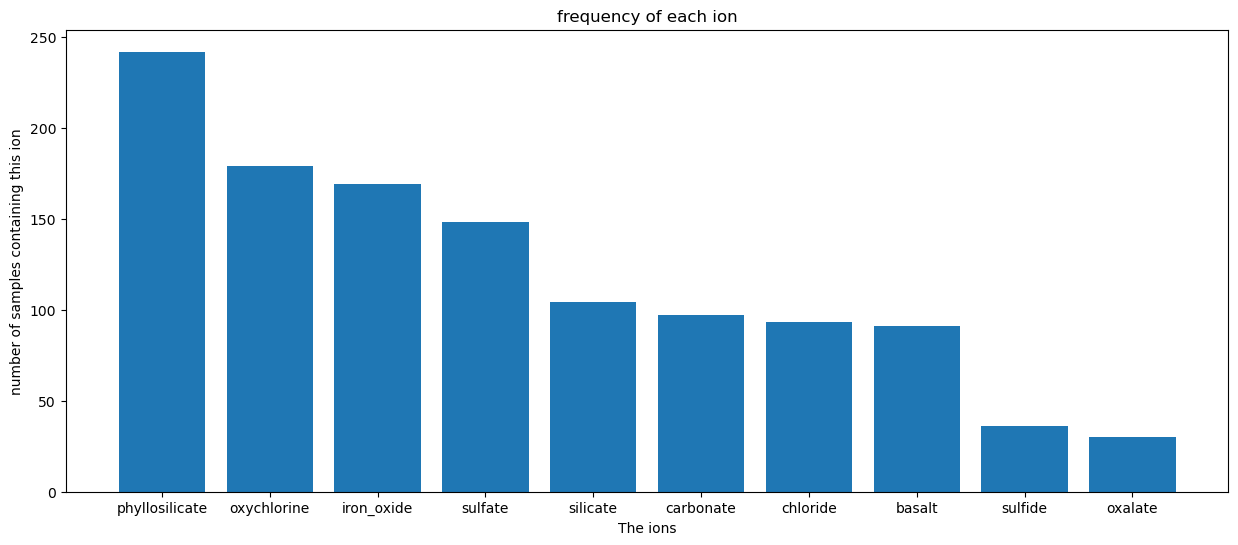

In [735]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



In [736]:
metadata[metadata.split !='test'].sample(5,random_state=random_state)

sample_id  split instrument_type                     features_path  \
sample_id                                                                      
S0030         S0030  train      commercial  ../Data/train_features/S0030.csv   
S0457         S0457  train      commercial  ../Data/train_features/S0457.csv   
S0315         S0315  train      commercial  ../Data/train_features/S0315.csv   
S0695         S0695  train      commercial  ../Data/train_features/S0695.csv   
S0639         S0639  train      commercial  ../Data/train_features/S0639.csv   

                          features_md5_hash  
sample_id                                    
S0030      3f109222fc2eaf306367a34928b7d29e  
S0457      2eba9eaf30a9fc395aadecc2e96329a0  
S0315      d0a0e3ed1b2cf1a2e9c3b7cfb9c41f19  
S0695      862aaab82267ca9043de24d65daa4e0e  
S0639      8a8196d4d294dbd5729f9c2e7730c023

Create a dictionary containing num_samples entries, with each entry being a dataframe corresponding to a sample. The sample identifier is used as the corresponding key. The samples are chosen at random from all of the samples except the "test" ones, to which we have no access. By taking num_samples to be the total number of samples one obtains a large dictionary with all samples there.

In [737]:
Dict = {}

metadata_slice = metadata[metadata.split !='test'].sample(num_samples,random_state=random_state)

for i, sample in enumerate(metadata_slice.index):

    Dict[sample] = pd.read_csv( metadata_slice['features_path'].iloc[i])

Test this: choose the first entry in the dictionary.

In [738]:
Dict[metadata_slice.index[0]]

time     temp   m/z     abundance
0         0.00   29.814   0.0  8.437885e-11
1         0.00   29.814   1.0  1.289016e-10
2         0.00   29.814   2.0  3.706687e-11
3         0.00   29.814   3.0  8.730649e-11
4         0.00   29.814   4.0  1.020082e-07
...        ...      ...   ...           ...
31895  1657.68  999.284  95.0  2.234883e-13
31896  1657.68  999.284  96.0  2.327381e-13
31897  1657.68  999.284  97.0  2.495188e-13
31898  1657.68  999.284  98.0  2.650069e-13
31899  1657.68  999.284  99.0  2.714654e-13

[31900 rows x 4 columns]

For the samples in our dictionary we plot temperature as a function of time.

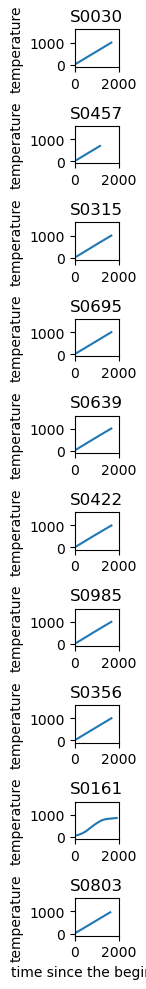

In [739]:

# Create a figure and an array of subplots indexed using ax

fig, ax = plt.subplots(num_samples,sharey = True,height_ratios=0.4*np.ones(num_samples))


for i, sample in enumerate(metadata_slice.sample_id): 

    ax[i].plot(Dict[sample].time,Dict[sample].temp)
    
    ax[i].set(xlim = (-1,2000),ylim = (-100,1600))

    ax[i].set_aspect('equal','box')
    
    plt.xlabel('time since the beginning')
    
    ax[i].set_ylabel('temperature')
    
    ax[i].set_title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



One can see the plots corresponding to various samples by running all cells above.

Now we plot the various ions grouped by m/z, on a logarithmic scale.

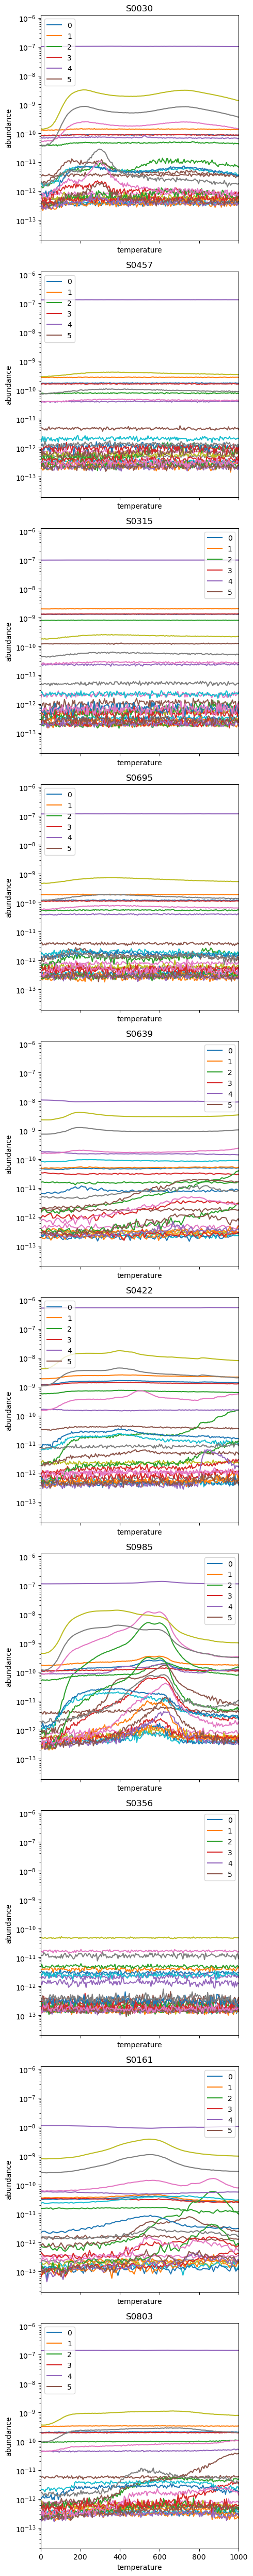

In [740]:
fig, ax = plt.subplots(num_samples,1,sharex = True,sharey = True,figsize = (5,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):

    

    plt.subplot(num_samples,1,i+1)

    

    for mz in range(0,28):
        X = Dict[sample][Dict[sample]['m/z'] == mz].time
        y = Dict[sample][Dict[sample]['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")

        
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()


    
    plt.yscale('log')
    plt.title(sample)
    



fig.tight_layout()     
    
fig.show()






We do the data cleaning suggested by the post. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [741]:

def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

# Check that indeed some values were dropped

for sample in Dict:

    Dataframe = Dict[sample]

    print ('Before the cleaning there were',len(Dataframe),'entries corresponding to',sample)

    Dataframe_clean = drop_non_int_and_He(Dataframe)

    print ('After the cleaning there are',len(Dataframe_clean),'entries corresponding to',sample)



Before the cleaning there were 31900 entries corresponding to S0030
After the cleaning there are 31581 entries corresponding to S0030
Before the cleaning there were 22000 entries corresponding to S0457
After the cleaning there are 21780 entries corresponding to S0457
Before the cleaning there were 31900 entries corresponding to S0315
After the cleaning there are 31581 entries corresponding to S0315
Before the cleaning there were 31900 entries corresponding to S0695
After the cleaning there are 31581 entries corresponding to S0695
Before the cleaning there were 32400 entries corresponding to S0639
After the cleaning there are 16038 entries corresponding to S0639
Before the cleaning there were 31900 entries corresponding to S0422
After the cleaning there are 31581 entries corresponding to S0422
Before the cleaning there were 31800 entries corresponding to S0985
After the cleaning there are 31482 entries corresponding to S0985
Before the cleaning there were 32000 entries corresponding to 

In [742]:
def subtract_min(df):

    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )

    return df


The next function scales the abundances by the formula $\frac{x-x_{\mathrm{min}}}{x_{max}-x_{min}}$ and forces them to be in the range (0,1)

In [743]:
from sklearn.preprocessing import minmax_scale

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    


In [744]:
def preprocess(df):
    return scale_to_zero_one(subtract_min(drop_non_int_and_He(df)))

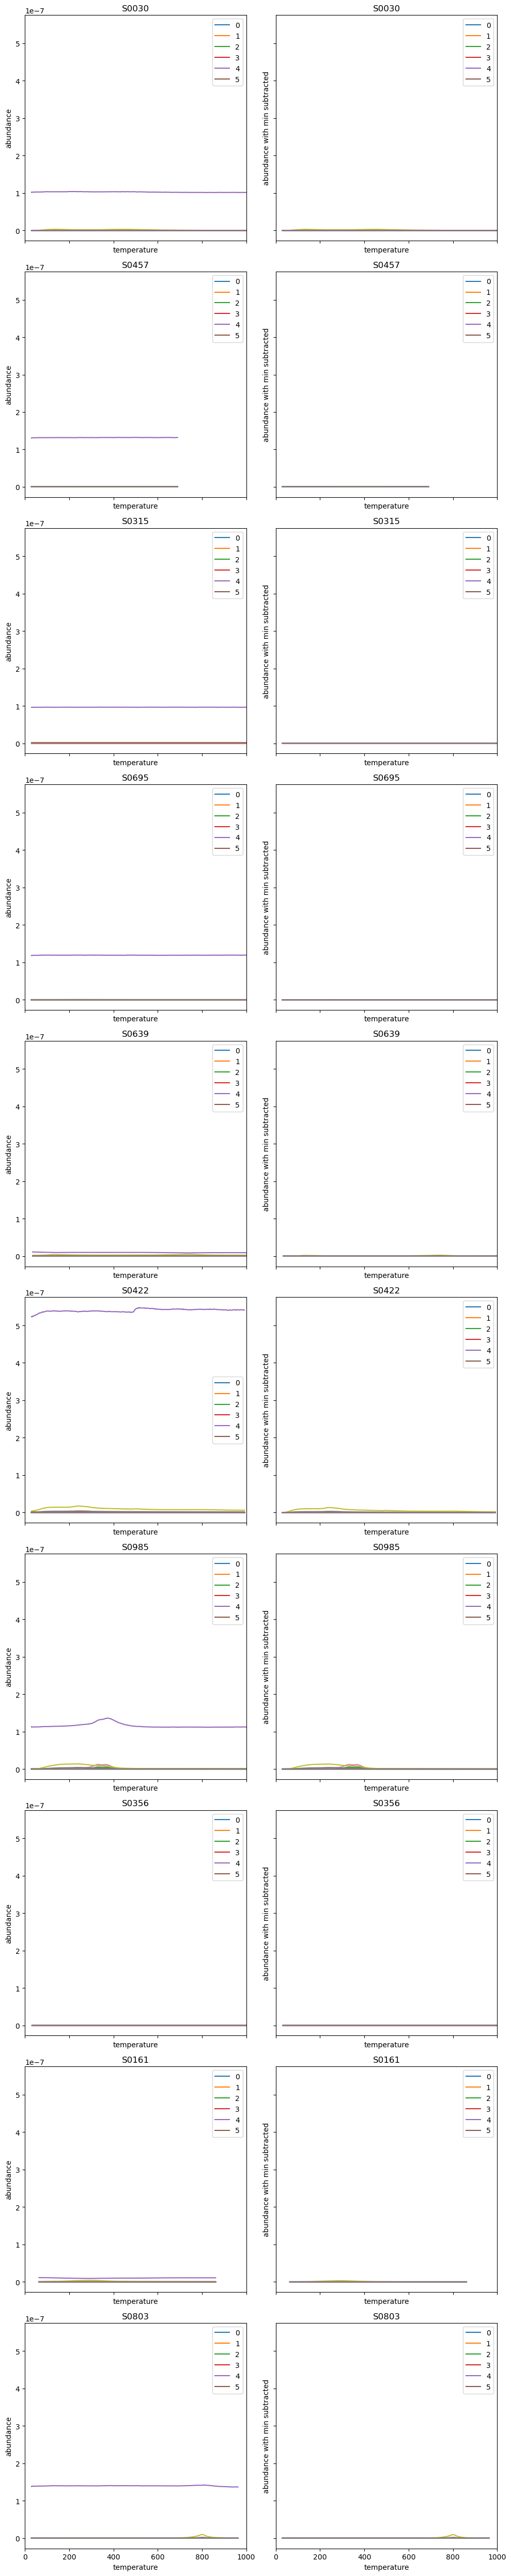

In [745]:
fig, ax = plt.subplots(num_samples,2,sharex = True,sharey = True,figsize = (10,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):



    df = Dict[sample]

    df_mod = subtract_min(drop_non_int_and_He(Dict[sample]))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].abundance_minsub

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Now we plot our samples with the 0-1 rescaling included

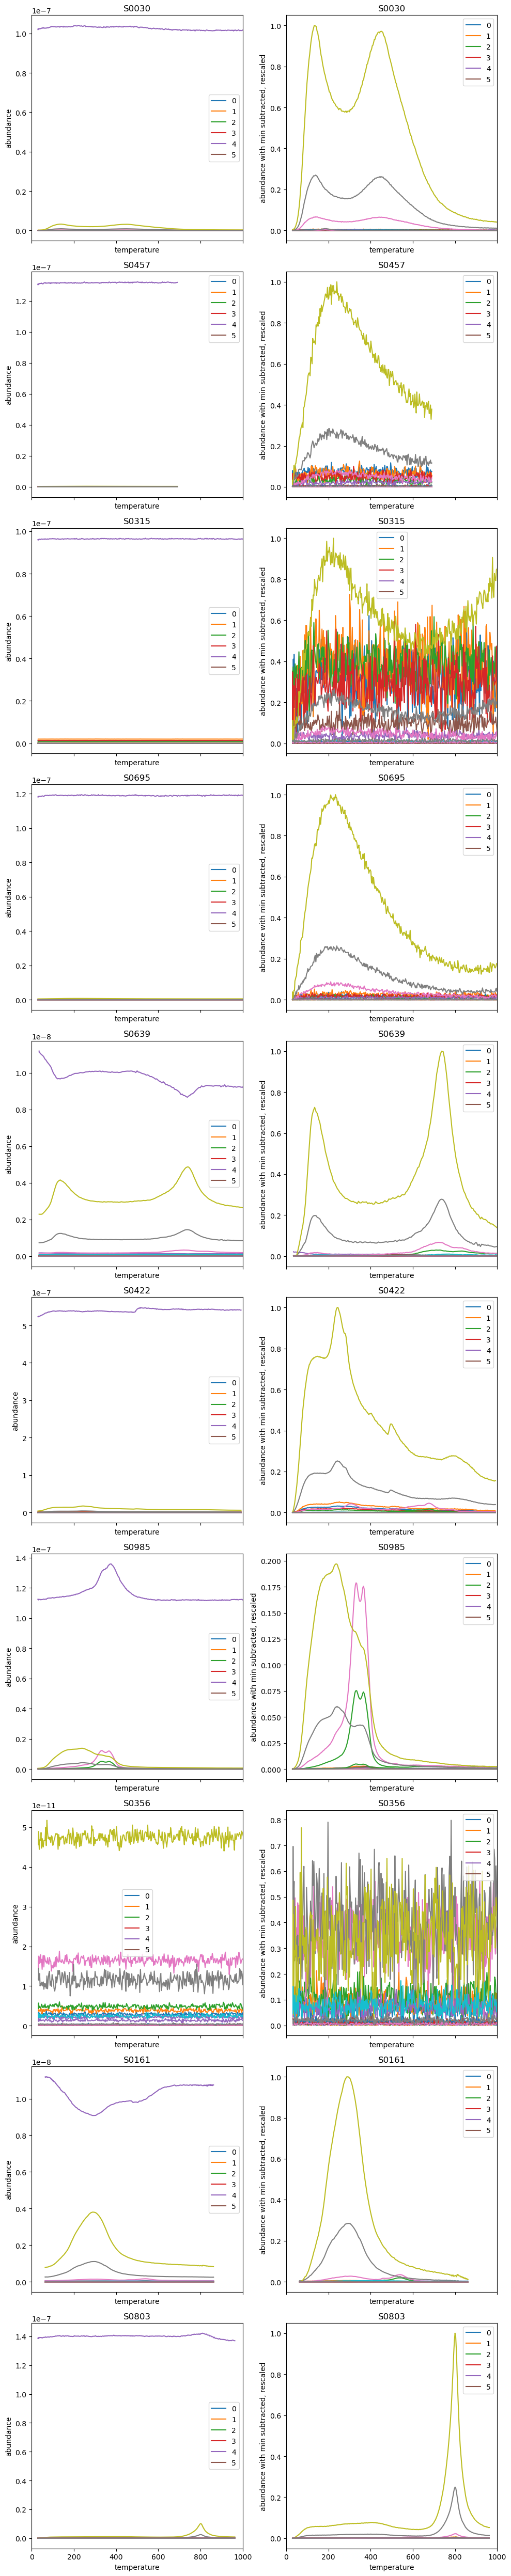

In [913]:
fig, ax = plt.subplots(num_samples,2,sharex = True,figsize = (10,5*num_samples))




for i, sample in enumerate(metadata_slice.sample_id):



    df = Dict[sample]

    df_mod = scale_to_zero_one(subtract_min(drop_non_int_and_He(Dict[sample])))



    plt.subplot(num_samples,2,2*i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    



fig.tight_layout()     
    
fig.show()





Check for memory issues

In [747]:
print (Dict.keys())

dict_keys(['S0030', 'S0457', 'S0315', 'S0695', 'S0639', 'S0422', 'S0985', 'S0356', 'S0161', 'S0803'])


In [748]:

for key in Dict.keys():
    print(Dict[key].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       31900 non-null  float64
 1   temp       31900 non-null  float64
 2   m/z        31900 non-null  float64
 3   abundance  31900 non-null  float64
dtypes: float64(4)
memory usage: 997.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       22000 non-null  float64
 1   temp       22000 non-null  float64
 2   m/z        22000 non-null  float64
 3   abundance  22000 non-null  float64
dtypes: float64(4)
memory usage: 687.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       31900 

It seems that each sample dataframe contributes about 1 MB of data, so loading them all would take something in the order of magnitude of 1GB

Now we will write a function that processes it. 

In [909]:
# The following takes in a dataframe with a zero_one_rescale column and returns a list 

def find_relevant_ratios(df):

    # The following variable stores all existing ratios in a list, after removing duplicates

    existing_ratios = list(set(df["m/z"].values))

    
    

    # the fist column will store the value of m/z, the second the corresponding mean and the third the std_dev. The fourth is the sum.

    comp_table = np.zeros((len(existing_ratios),4)) 

    for i,ratio_value in enumerate(existing_ratios):
        
        comp_table[i,0] = ratio_value 
        
        df_temp = df.loc[df["m/z"]==ratio_value] # look at the subset of the dataframe corresponding to the ratio
        
        comp_table[i,1] = np.nanmean(df_temp.zero_one_rescale.values)
        comp_table[i,2] = np.nanstd(df_temp.zero_one_rescale.values)
        comp_table[i,3] = comp_table[i,1]+comp_table[i,2]
        
        del df_temp
    
    # now we sort the table with respect to highest sum of mean and standard deviation
    
    comp_table[comp_table[:,3].argsort()[::-1]]

    # we return the five most relevant values of m/z

    return comp_table[comp_table[:,3].argsort()[::-1]][:5,0]



Check that it works:

In [910]:

df = pd.read_csv(train_files['S0025'])

df_mod = preprocess(df)

print(find_relevant_ratios(df_mod))

[28. 44. 32. 16. 18.]


The following puts together what we have done. It first creates a standardized column, then it selects the most relevant features and gets rid of the rest. It returns a new data frame containing only the most relevant values of m/z

In [751]:
def reduce_data_frame(df):
    df_temp = preprocess(df)
    relevant_ratios = find_relevant_ratios(df_temp)

    df_temp = df_temp[df_temp['m/z'].isin(relevant_ratios)]
    
    return df_temp



Check that it works on an example

In [752]:
df = Dict[list(Dict.keys())[2]]

df_processed = reduce_data_frame(df)

print(set(df_processed['m/z'].values))

{32.0, 1.0, 2.0, 3.0, 18.0}


Now create plots to see what's going on

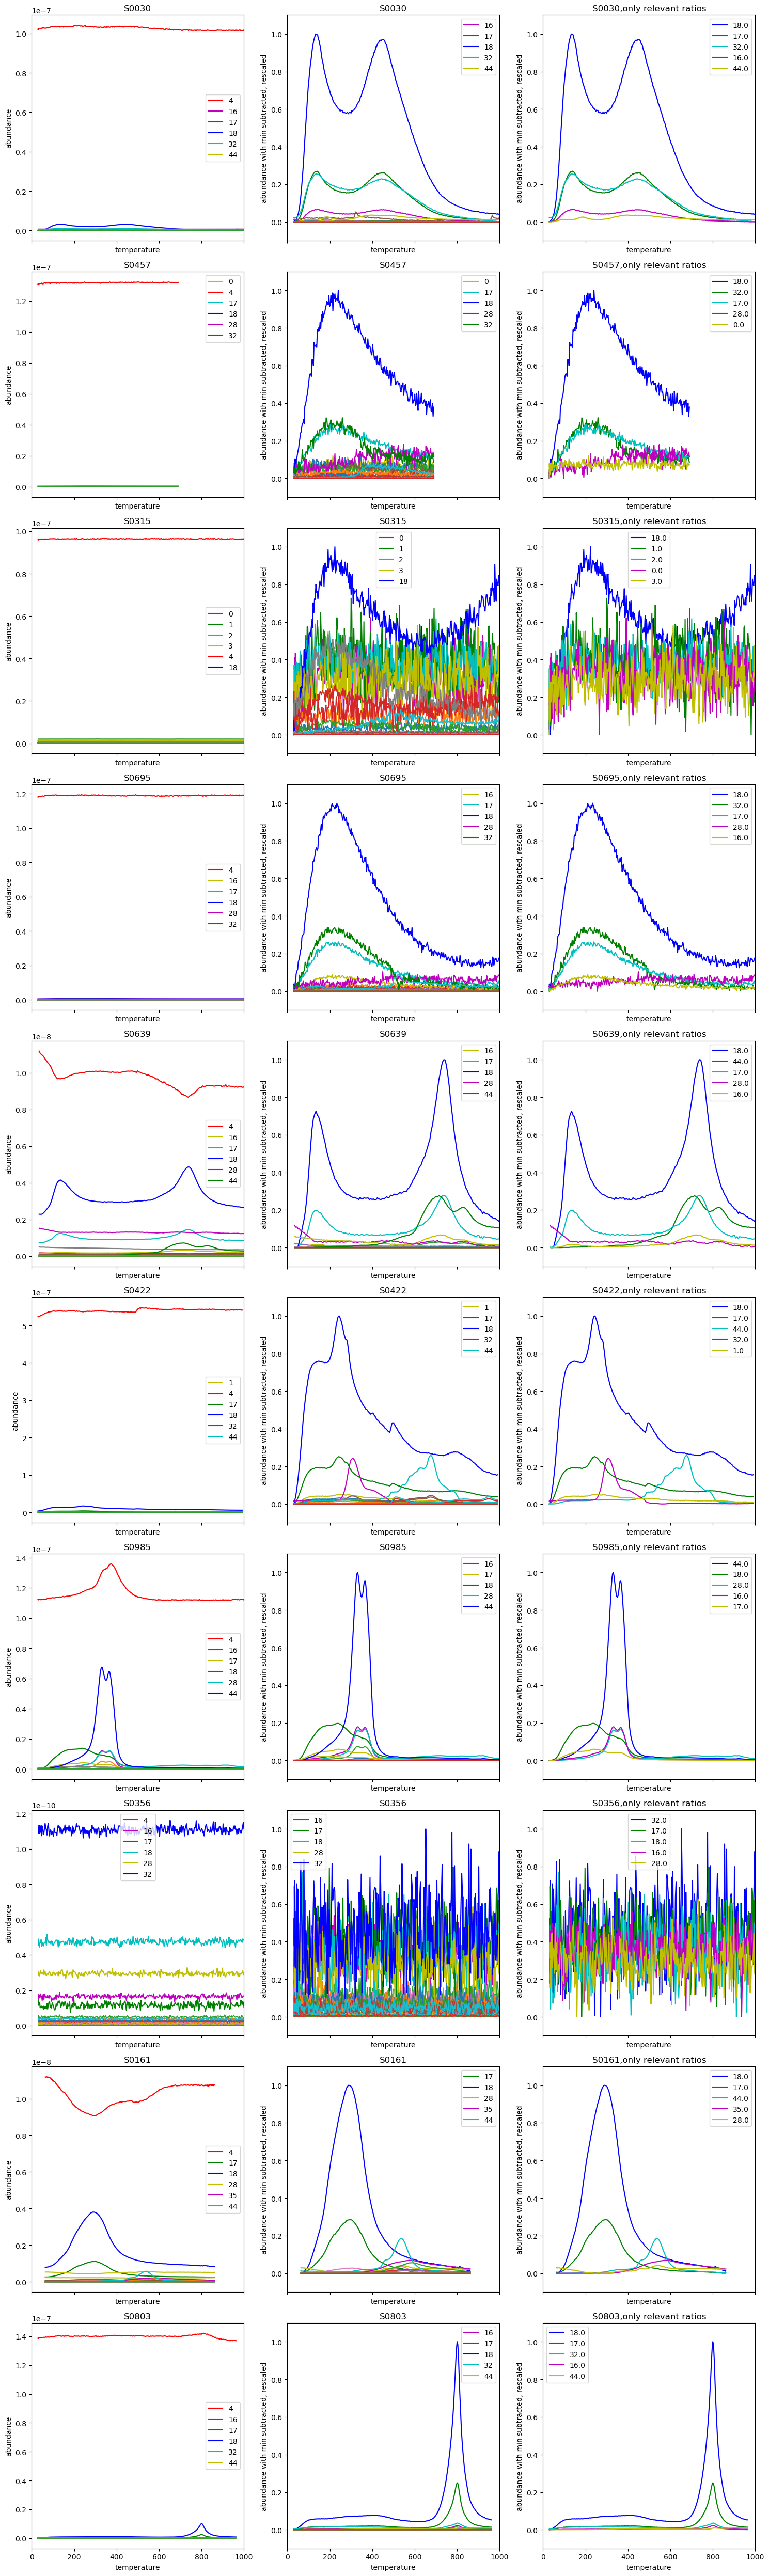

In [912]:
import warnings
warnings.filterwarnings("ignore") # ignore some annoying warnings

colors = ['b','g','c','m','y','r']


num_columns = 3

fig, ax = plt.subplots(num_samples,num_columns,sharex = True,figsize = (5*num_columns,5*num_samples))


for i, sample in enumerate(metadata_slice.sample_id):

    # Load the dataframe

    df = Dict[sample]

    # Preprocess it

    df_mod = preprocess(Dict[sample])

    relevant_ratios = find_relevant_ratios(df_mod)
    

    plt.subplot(num_samples,num_columns,num_columns*i+1)    

    for mz in range(0,99):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in np.append(relevant_ratios,[4]):
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(np.append(relevant_ratios,[4])==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,num_columns,num_columns*i+2)    

    for mz in range(0,99):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in relevant_ratios:
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    plt.subplot(num_samples,num_columns,num_columns*i+3)
    
    for mz in relevant_ratios:
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show all legends            
        
        plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        
        
        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample+",only relevant ratios")
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    



fig.tight_layout()     
    
fig.show()




## Augmenting the train_labels file

Recall what the train_labels file looks like

In [754]:
train_labels

basalt  carbonate  chloride  iron_oxide  oxalate  oxychlorine  \
sample_id                                                                  
S0000           0          0         0           0        0            0   
S0001           0          1         0           0        0            0   
S0002           0          0         0           0        0            1   
S0003           0          1         0           1        0            0   
S0004           0          0         0           1        0            1   
...           ...        ...       ...         ...      ...          ...   
S0749           0          0         0           0        0            0   
S0750           0          0         0           0        0            0   
S0751           0          0         0           0        0            0   
S0752           0          0         0           1        0            0   
S0753           1          0         0           0        0            1   

           phyllosilicate  silicate  sulfate  sulfide  
sample_id                                              
S0000                   0         0        1        0  
S0001                   0         0        0        0  
S0002                   0         0        0        0  
S0003                   0         0        1        0  
S0004                   1         0        0        0  
...                   ...       ...      ...      ...  
S0749                   0         0        0        0  
S0750                   1         0        0        0  
S0751                   0         1        0        0  
S0752                   0         0        0        0  
S0753                   0         0        0        0  

[754 rows x 10 columns]

We will add columns to it corresponding to the most prominent ratios, at what temperature they peak, and what the peak is

In [813]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

In [819]:
for i in range(num_of_ratios):
        
        train_labels[str(i+1)+'_ratio'] = np.nan
        train_labels[str(i+1)+'_ratio_peak_temp'] = np.nan
        train_labels[str(i+1)+'_ratio_peak_abund'] = np.nan

train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, S0000 to S0753
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   basalt              754 non-null    int64  
 1   carbonate           754 non-null    int64  
 2   chloride            754 non-null    int64  
 3   iron_oxide          754 non-null    int64  
 4   oxalate             754 non-null    int64  
 5   oxychlorine         754 non-null    int64  
 6   phyllosilicate      754 non-null    int64  
 7   silicate            754 non-null    int64  
 8   sulfate             754 non-null    int64  
 9   sulfide             754 non-null    int64  
 10  1_ratio             0 non-null      float64
 11  1_ratio_peak_temp   0 non-null      float64
 12  1_ratio_peak_abund  0 non-null      float64
 13  2_ratio             0 non-null      float64
 14  2_ratio_peak_temp   0 non-null      float64
 15  2_ratio_peak_abund  0 non-null      float64
 16  3_ratio

In [880]:

for index, sample in enumerate(train_labels.index[:25]):
    
    df = pd.read_csv(train_files[sample])

    df_mod = preprocess(df)

    relevant_ratios = np.sort(find_relevant_ratios(df_mod))

    

    for i in range(len(relevant_ratios)):

        label = str(i+1)+'_ratio'

        train_labels[label][index] = relevant_ratios[i]

        

        index_where_max_ab_occurs = df_mod[df_mod['m/z']==relevant_ratios[i]].zero_one_rescale.argmax()

        train_labels[label+'_peak_temp'][index] = df_mod[df_mod['m/z']==relevant_ratios[i]].temp.iloc[index_where_max_ab_occurs]

        train_labels[label+'_peak_abund'][index] = df_mod[df_mod['m/z']==relevant_ratios[i]].zero_one_rescale.max()

        
       
        
    
        

    del df
    del df_mod
        

train_labels.head()




basalt  carbonate  chloride  iron_oxide  oxalate  oxychlorine  \
sample_id                                                                  
S0000           0          0         0           0        0            0   
S0001           0          1         0           0        0            0   
S0002           0          0         0           0        0            1   
S0003           0          1         0           1        0            0   
S0004           0          0         0           1        0            1   

           phyllosilicate  silicate  sulfate  sulfide  ...  \
sample_id                                              ...   
S0000                   0         0        1        0  ...   
S0001                   0         0        0        0  ...   
S0002                   0         0        0        0  ...   
S0003                   0         0        1        0  ...   
S0004                   1         0        0        0  ...   

           2_ratio_peak_abund  3_ratio  3_ratio_peak_temp  3_ratio_peak_abund  \
sample_id                                                                       
S0000                0.276675     18.0            103.666            1.000000   
S0001                0.093082     18.0            -60.370            0.030234   
S0002                0.040446     17.0            145.673            0.254002   
S0003                0.260027     18.0            120.720            1.000000   
S0004                0.238290     18.0            142.874            1.000000   

           4_ratio  4_ratio_peak_temp  4_ratio_peak_abund  5_ratio  \
sample_id                                                            
S0000         19.0            105.458            0.006600     28.0   
S0001         32.0            -60.370            0.033209     44.0   
S0002         18.0            145.673            1.000000     32.0   
S0003         28.0            593.222            0.081701     44.0   
S0004         32.0            471.733            0.595652     44.0   

           5_ratio_peak_temp  5_ratio_peak_abund  
sample_id                                         
S0000                 35.420            0.010877  
S0001                497.404            1.000000  
S0002                545.304            0.294738  
S0003                593.222            0.485557  
S0004                333.273            0.029998  

[5 rows x 25 columns]

In [885]:
df = pd.read_csv("../Data/train_features/S0025.csv")

df_mod = preprocess(df)

print (find_relevant_ratios(preprocess(df)))

df.temp.min()

print( set(df['m/z'].values))



[47. 73. 69. 68. 62.]
{2.0, 4.0, 6.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 56.0, 57.0, 58.0, 59.0, 63.0, 64.0, 65.0, 66.0, 67.0, 70.0, 72.0, 74.0, 82.0, 83.0, 86.0, 91.0, 94.0}


           time     temp   m/z     abundance  abundance_minsub  \
18        0.000   38.805  28.0  6.103140e-11      4.764000e-12   
77        5.518   38.815  28.0  6.123530e-11      4.967900e-12   
136      11.018   38.831  28.0  6.296670e-11      6.699300e-12   
195      16.626   38.854  28.0  6.112410e-11      4.856700e-12   
254      22.205   38.901  28.0  6.060880e-11      4.341400e-12   
...         ...      ...   ...           ...               ...   
17246  1615.248  926.584  28.0  7.151780e-11      1.525040e-11   
17305  1620.748  929.679  28.0  7.172730e-11      1.545990e-11   
17364  1626.268  932.779  28.0  7.113040e-11      1.486300e-11   
17423  1631.758  935.852  28.0  7.257260e-11      1.630520e-11   
17482  1637.268  938.931  28.0  7.192010e-11      1.565270e-11   

       zero_one_rescale  
18             0.191551  
77             0.199750  
136            0.269366  
195            0.195279  
254            0.174559  
...                 ...  
17246          0.613189  

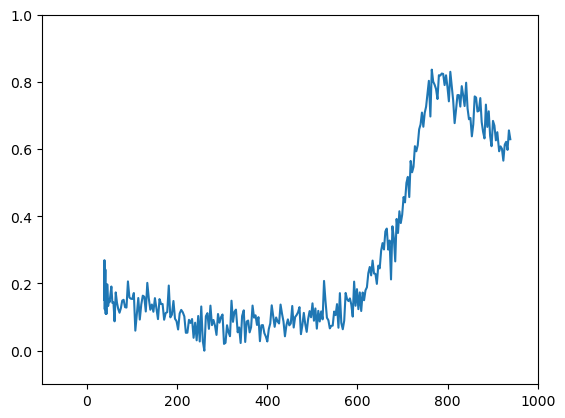

           time     temp   m/z     abundance  abundance_minsub  \
33        0.000   38.805  44.0  3.282910e-13      2.002000e-14   
92        5.518   38.815  44.0  3.308760e-13      2.260500e-14   
151      11.018   38.831  44.0  4.091130e-13      1.008420e-13   
210      16.626   38.854  44.0  4.408110e-13      1.325400e-13   
269      22.205   38.901  44.0  4.532310e-13      1.449600e-13   
...         ...      ...   ...           ...               ...   
17261  1615.248  926.584  44.0  5.477330e-12      5.169059e-12   
17320  1620.748  929.679  44.0  5.400400e-12      5.092129e-12   
17379  1626.268  932.779  44.0  4.878580e-12      4.570309e-12   
17438  1631.758  935.852  44.0  5.077620e-12      4.769349e-12   
17497  1637.268  938.931  44.0  4.822040e-12      4.513769e-12   

       zero_one_rescale  
33             0.000805  
92             0.000909  
151            0.004055  
210            0.005329  
269            0.005829  
...                 ...  
17261          0.207838  

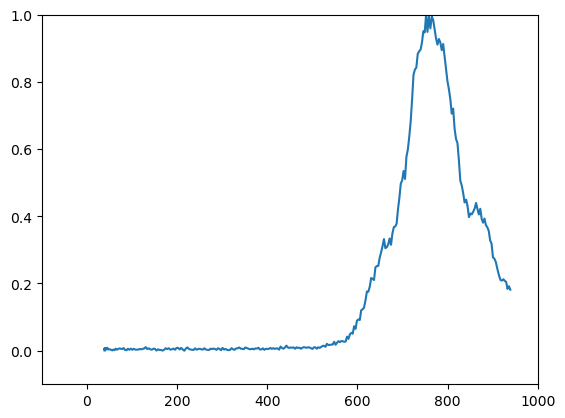

           time     temp   m/z     abundance  abundance_minsub  \
22        0.000   38.805  32.0  5.296570e-11      3.141800e-12   
81        5.518   38.815  32.0  5.271640e-11      2.892500e-12   
140      11.018   38.831  32.0  5.110750e-11      1.283600e-12   
199      16.626   38.854  32.0  5.269340e-11      2.869500e-12   
258      22.205   38.901  32.0  5.350540e-11      3.681500e-12   
...         ...      ...   ...           ...               ...   
17250  1615.248  926.584  32.0  6.014900e-11      1.032510e-11   
17309  1620.748  929.679  32.0  5.993590e-11      1.011200e-11   
17368  1626.268  932.779  32.0  6.047340e-11      1.064950e-11   
17427  1631.758  935.852  32.0  5.871870e-11      8.894800e-12   
17486  1637.268  938.931  32.0  5.926840e-11      9.444500e-12   

       zero_one_rescale  
22             0.126326  
81             0.116302  
140            0.051611  
199            0.115377  
258            0.148026  
...                 ...  
17250          0.415152  

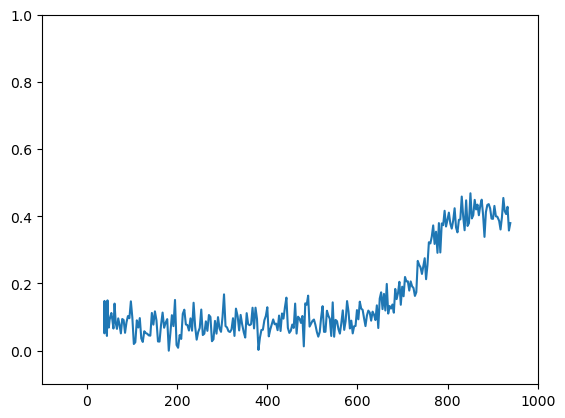

           time     temp   m/z     abundance  abundance_minsub  \
7         0.000   38.805  16.0  6.868350e-12      7.451900e-13   
66        5.518   38.815  16.0  7.049270e-12      9.261100e-13   
125      11.018   38.831  16.0  6.847590e-12      7.244300e-13   
184      16.626   38.854  16.0  6.802910e-12      6.797500e-13   
243      22.205   38.901  16.0  7.012380e-12      8.892200e-13   
...         ...      ...   ...           ...               ...   
17235  1615.248  926.584  16.0  8.087720e-12      1.964560e-12   
17294  1620.748  929.679  16.0  8.391730e-12      2.268570e-12   
17353  1626.268  932.779  16.0  9.110960e-12      2.987800e-12   
17412  1631.758  935.852  16.0  9.164720e-12      3.041560e-12   
17471  1637.268  938.931  16.0  8.658660e-12      2.535500e-12   

       zero_one_rescale  
7              0.029963  
66             0.037237  
125            0.029128  
184            0.027331  
243            0.035754  
...                 ...  
17235          0.078991  

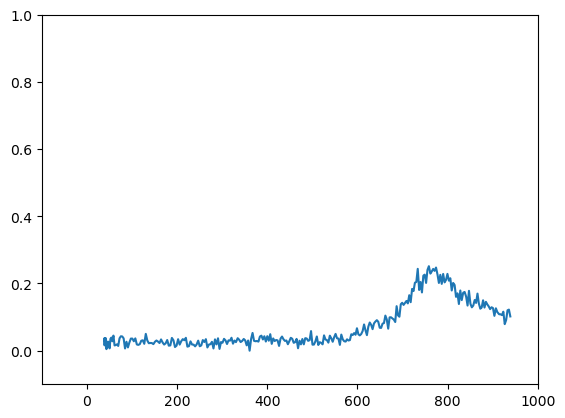

           time     temp   m/z     abundance  abundance_minsub  \
9         0.000   38.805  18.0  2.430760e-11      1.099200e-12   
68        5.518   38.815  18.0  2.495090e-11      1.742500e-12   
127      11.018   38.831  18.0  2.363850e-11      4.301000e-13   
186      16.626   38.854  18.0  2.393320e-11      7.248000e-13   
245      22.205   38.901  18.0  2.421310e-11      1.004700e-12   
...         ...      ...   ...           ...               ...   
17237  1615.248  926.584  18.0  2.523450e-11      2.026100e-12   
17296  1620.748  929.679  18.0  2.579430e-11      2.585900e-12   
17355  1626.268  932.779  18.0  2.536610e-11      2.157700e-12   
17414  1631.758  935.852  18.0  2.516520e-11      1.956800e-12   
17473  1637.268  938.931  18.0  2.510470e-11      1.896300e-12   

       zero_one_rescale  
9              0.044197  
68             0.070063  
127            0.017293  
186            0.029143  
245            0.040397  
...                 ...  
17237          0.081466  

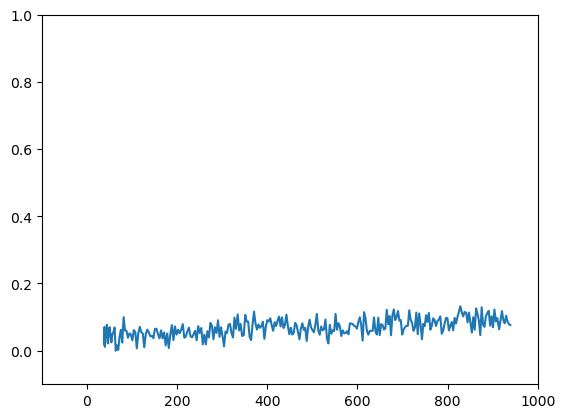

In [911]:


df_mod = preprocess(df)

for i in find_relevant_ratios(preprocess(df)):
    print(df_mod[df_mod['m/z']==i])
    fig = plt.plot(df_mod[df_mod['m/z']==i].temp,df_mod[df_mod['m/z']==i].zero_one_rescale)

    plt.xlim(-100,1000)
    plt.ylim(-.1,1)

    plt.show()

In [809]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, S0000 to S0753
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   basalt          754 non-null    int64  
 1   carbonate       754 non-null    int64  
 2   chloride        754 non-null    int64  
 3   iron_oxide      754 non-null    int64  
 4   oxalate         754 non-null    int64  
 5   oxychlorine     754 non-null    int64  
 6   phyllosilicate  754 non-null    int64  
 7   silicate        754 non-null    int64  
 8   sulfate         754 non-null    int64  
 9   sulfide         754 non-null    int64  
 10  1th ratio       754 non-null    float64
 11  2th ratio       754 non-null    float64
 12  3th ratio       754 non-null    float64
 13  4th ratio       754 non-null    float64
 14  5th ratio       754 non-null    float64
dtypes: float64(5), int64(10)
memory usage: 110.4+ KB


In [827]:
list_of_samples = train_labels.index.values[:5]

print (list_of_samples)

['S0000' 'S0001' 'S0002' 'S0003' 'S0004']


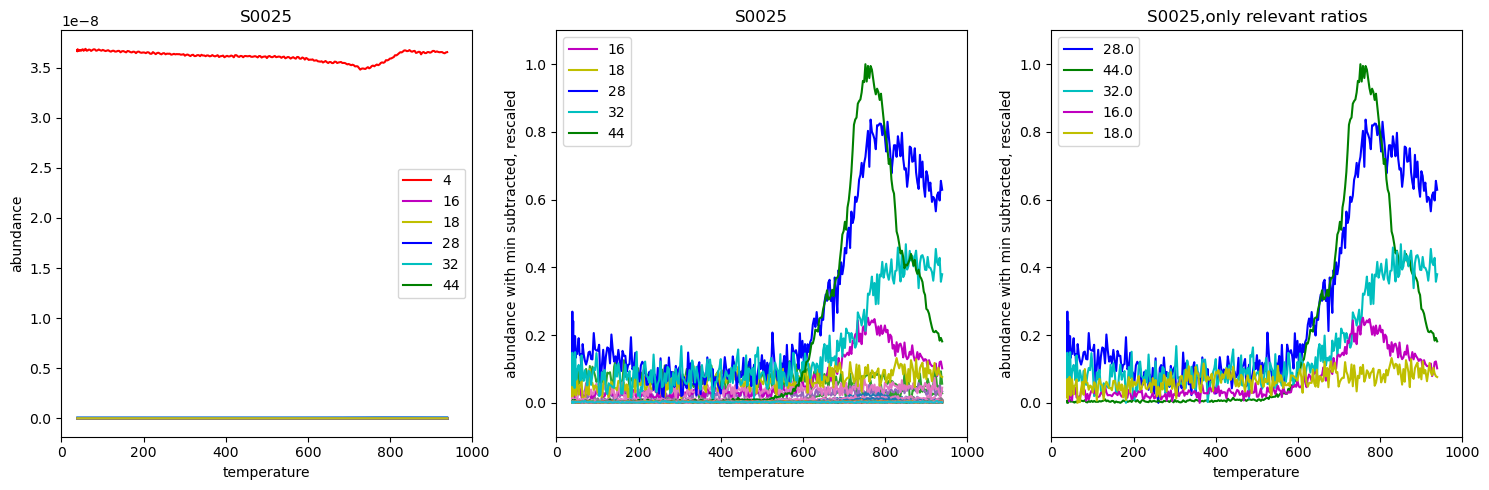

In [916]:
import warnings
warnings.filterwarnings("ignore") # ignore some annoying warnings

colors = ['b','g','c','m','y','r']

list_of_samples = ['S0025']

num_samples=1

num_columns = 3

fig, ax = plt.subplots(num_samples,num_columns,sharex = True,figsize = (5*num_columns,5*num_samples))


for i, sample in enumerate(list_of_samples):

    # Load the dataframe

    df = pd.read_csv(train_files[sample])

    # Preprocess it

    df_mod = preprocess(df)

    relevant_ratios = find_relevant_ratios(df_mod)
    

    plt.subplot(num_samples,num_columns,num_columns*i+1)    

    for mz in range(0,99):
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in np.append(relevant_ratios,[4]):
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(np.append(relevant_ratios,[4])==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        
        
        # ax[i] = plt.show()
        plt.yscale('linear')
    
    plt.subplot(num_samples,num_columns,num_columns*i+2)    

    for mz in range(0,99):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz in relevant_ratios:
            plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    plt.subplot(num_samples,num_columns,num_columns*i+3)
    
    for mz in relevant_ratios:
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show all legends            
        
        plt.plot(X,y,label = str(mz),color = colors[int(np.where(relevant_ratios==mz)[0])])
        
        
        plt.xlabel('temperature')
        plt.ylabel('abundance with min subtracted, rescaled')
        plt.xlim(0,1000)
        plt.ylim(-0.1,1.1)
        plt.title(sample+",only relevant ratios")
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')

    



fig.tight_layout()     
    
fig.show()


